In [7]:
#Importando as bibliotecas
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#Lendo o arquivo de ações
#Lendo csv
df=pd.read_csv( 'df_all_bovespa.csv', delimiter=',' )
df

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento
0,ABCB4,ABC BRASIL,2009-01-02,5.05,5.30,4.95,122849600.0,241000.0,5.30
1,ABNB3,ABNOTE,2009-01-02,10.77,10.99,10.76,8168000.0,7500.0,10.90
2,ABYA3,ABYARA,2009-01-02,1.55,1.64,1.53,17575000.0,109800.0,1.61
3,ACGU3,GUARANI,2009-01-02,2.10,2.19,2.10,5821600.0,27100.0,2.19
4,AEDU11,ANHANGUERA,2009-01-02,12.11,12.51,12.00,261919900.0,211500.0,12.49
...,...,...,...,...,...,...,...,...,...
1019560,Z1TO34,ZTO EXPRESS,2020-12-28,36.72,36.72,36.72,135864.0,37.0,36.72
1019561,Z1TO34,ZTO EXPRESS,2020-12-29,36.31,36.31,36.31,363100.0,100.0,36.31
1019562,Z1TO34,ZTO EXPRESS,2020-12-30,38.09,38.09,37.50,229517.0,61.0,37.50
1019563,Z1TS34,ZOETIS INC,2020-12-23,209.18,209.18,209.18,1045900.0,50.0,209.18


In [16]:
#Previsao Itau
df_itau = df[df['sigla_acao'] == 'ITUB4']
df_itau.head(10)

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento
29829,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,2.918122e+10,9626900.0,30.03
30159,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,1.438394e+10,4823400.0,29.99
30490,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,1.532921e+10,5076900.0,30.38
30807,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,5.183482e+09,1710900.0,30.40
31141,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,2.950766e+10,9462000.0,31.55
31482,ITUB4,ITAUUNIBANCO,2009-05-27,31.60,32.50,31.46,2.399693e+10,7507900.0,31.69
31822,ITUB4,ITAUUNIBANCO,2009-05-28,32.00,32.29,31.50,2.207571e+10,6907900.0,32.00
32163,ITUB4,ITAUUNIBANCO,2009-05-29,32.29,32.45,31.31,4.208345e+10,13216200.0,31.90
32511,ITUB4,ITAUUNIBANCO,2009-06-01,32.81,33.12,32.22,2.277778e+10,6933200.0,32.78
32858,ITUB4,ITAUUNIBANCO,2009-06-02,32.65,33.12,31.98,1.967229e+10,6050900.0,32.37


In [17]:
#Verificar o tipo do arquivo
df_itau.dtypes

sigla_acao                 object
nome_acao                  object
data_pregao                object
preco_abertura            float64
preco_maximo              float64
preco_minimo              float64
volume_total_negociado    float64
qnt_total_negociado       float64
preco_fechamento          float64
dtype: object

In [19]:
#Mudar o tipo data
df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'], format='%Y-%m-%d')

/home/leonardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_itau.dtypes

sigla_acao                        object
nome_acao                         object
data_pregao               datetime64[ns]
preco_abertura                   float64
preco_maximo                     float64
preco_minimo                     float64
volume_total_negociado           float64
qnt_total_negociado              float64
preco_fechamento                 float64
dtype: object

In [21]:
df_itau.tail()

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento
1017653,ITUB4,ITAUUNIBANCO,2020-12-22,31.17,31.65,31.15,6.169132e+10,19659000.0,31.25
1017654,ITUB4,ITAUUNIBANCO,2020-12-23,31.32,32.05,31.27,6.356557e+10,19959200.0,31.94
1017655,ITUB4,ITAUUNIBANCO,2020-12-28,32.22,32.43,32.01,4.973340e+10,15444600.0,32.17
1017656,ITUB4,ITAUUNIBANCO,2020-12-29,32.27,32.39,31.93,5.254648e+10,16384200.0,32.10
1017657,ITUB4,ITAUUNIBANCO,2020-12-30,32.20,32.33,31.63,8.162117e+10,25644400.0,31.63


In [22]:
#Criando novos campos de medias móveis
df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()

/home/leonardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/leonardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df_itau.head(7)

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento,mm5d,mm21d
29829,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,2.918122e+10,9626900.0,30.03,NaN,NaN
30159,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,1.438394e+10,4823400.0,29.99,NaN,NaN
30490,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,1.532921e+10,5076900.0,30.38,NaN,NaN
30807,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,5.183482e+09,1710900.0,30.40,NaN,NaN
31141,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,2.950766e+10,9462000.0,31.55,30.470,NaN
31482,ITUB4,ITAUUNIBANCO,2009-05-27,31.60,32.50,31.46,2.399693e+10,7507900.0,31.69,30.802,NaN
31822,ITUB4,ITAUUNIBANCO,2009-05-28,32.00,32.29,31.50,2.207571e+10,6907900.0,32.00,31.204,NaN


In [24]:
#Empurrando para frente os valores das ações
df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)

df_itau.head()

/home/leonardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento,mm5d,mm21d
29829,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,2.918122e+10,9626900.0,29.99,NaN,NaN
30159,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,1.438394e+10,4823400.0,30.38,NaN,NaN
30490,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,1.532921e+10,5076900.0,30.40,NaN,NaN
30807,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,5.183482e+09,1710900.0,31.55,NaN,NaN
31141,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,2.950766e+10,9462000.0,31.69,30.47,NaN


In [25]:
#Retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau

/home/leonardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento,mm5d,mm21d
36492,ITUB4,ITAUUNIBANCO,2009-06-18,30.60,30.73,30.00,1.123001e+10,3701800.0,30.60,30.874,31.310000
36816,ITUB4,ITAUUNIBANCO,2009-06-19,30.49,31.02,30.24,1.501500e+10,4899200.0,30.38,30.590,31.337143
37145,ITUB4,ITAUUNIBANCO,2009-06-22,30.30,30.50,29.94,1.528099e+10,5057100.0,29.75,30.482,31.355714
37471,ITUB4,ITAUUNIBANCO,2009-06-23,30.59,30.59,29.61,2.265832e+10,7573500.0,29.75,30.286,31.325714
37798,ITUB4,ITAUUNIBANCO,2009-06-24,29.87,30.20,29.26,2.079423e+10,6990200.0,30.43,30.124,31.294762
...,...,...,...,...,...,...,...,...,...,...,...
1017652,ITUB4,ITAUUNIBANCO,2020-12-21,31.05,31.50,30.91,8.122629e+10,26014600.0,31.25,31.476,30.315714
1017653,ITUB4,ITAUUNIBANCO,2020-12-22,31.17,31.65,31.15,6.169132e+10,19659000.0,31.94,31.494,30.427619
1017654,ITUB4,ITAUUNIBANCO,2020-12-23,31.32,32.05,31.27,6.356557e+10,19959200.0,32.17,31.532,30.533810
1017655,ITUB4,ITAUUNIBANCO,2020-12-28,32.22,32.43,32.01,4.973340e+10,15444600.0,32.10,31.624,30.667619


In [27]:
#Verificando quantidade de linhas
qtd_linhas = len(df_itau)
qtd_linhas_treino = qtd_linhas - 700
qtd_linhas_teste = qtd_linhas - 15

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao= {qtd_linhas_teste}:{qtd_linhas}"
)

info

'linhas treino= 0:2153 linhas teste= 2153:2838 linhas validacao= 2838:2853'

In [29]:
#Reindexando o Data Frame
df_itau = df_itau.reset_index(drop=True)
df_itau

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qnt_total_negociado,preco_fechamento,mm5d,mm21d
0,ITUB4,ITAUUNIBANCO,2009-06-18,30.60,30.73,30.00,1.123001e+10,3701800.0,30.60,30.874,31.310000
1,ITUB4,ITAUUNIBANCO,2009-06-19,30.49,31.02,30.24,1.501500e+10,4899200.0,30.38,30.590,31.337143
2,ITUB4,ITAUUNIBANCO,2009-06-22,30.30,30.50,29.94,1.528099e+10,5057100.0,29.75,30.482,31.355714
3,ITUB4,ITAUUNIBANCO,2009-06-23,30.59,30.59,29.61,2.265832e+10,7573500.0,29.75,30.286,31.325714
4,ITUB4,ITAUUNIBANCO,2009-06-24,29.87,30.20,29.26,2.079423e+10,6990200.0,30.43,30.124,31.294762
...,...,...,...,...,...,...,...,...,...,...,...
2848,ITUB4,ITAUUNIBANCO,2020-12-21,31.05,31.50,30.91,8.122629e+10,26014600.0,31.25,31.476,30.315714
2849,ITUB4,ITAUUNIBANCO,2020-12-22,31.17,31.65,31.15,6.169132e+10,19659000.0,31.94,31.494,30.427619
2850,ITUB4,ITAUUNIBANCO,2020-12-23,31.32,32.05,31.27,6.356557e+10,19959200.0,32.17,31.532,30.533810
2851,ITUB4,ITAUUNIBANCO,2020-12-28,32.22,32.43,32.01,4.973340e+10,15444600.0,32.10,31.624,30.667619


In [30]:
#Separando as features e labels
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_itau['preco_fechamento']

In [31]:
#Escolhendo as melhores features com KBest

features_list = ('preco_abertura', 'qtd_total_negociado', 'volume_total_negociado', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores Features:")
print(k_best_features_final)


Melhores Features:
{'volume_total_negociado': 97.5189559468017, 'mm5d': 93.408285349463, 'qtd_total_negociado': 73.9580955825343, 'mm21d': 1.487954946854658}


In [32]:
#Separando as features escolhidas
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [33]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('features: ',features_scale.shape)
print(features_scale) # Normalizando os dados de entrada(features)

features:  (2853, 5)
[[0.29033271 0.3066544  0.02455398 0.02904986 0.29564598]
 [0.29943503 0.31401411 0.03593236 0.0411089  0.28644551]
 [0.28311362 0.30481447 0.036732   0.04269911 0.28294674]
 ...
 [0.33176397 0.34559951 0.18188463 0.19277847 0.31696255]
 [0.34369115 0.36829193 0.1403025  0.14731184 0.31994298]
 [0.34243566 0.3658387  0.14875914 0.15677457 0.32279383]]


In [34]:
#Separa os dados de treino teste e validacao
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2153 2153
685 685


In [38]:
#treinamento usando regressao linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
cd = r2_score(pred, y_test)

f'Coeficiente de determinação: {cd * 100:.2f}'

'Coeficiente de determinação: 98.34'

In [42]:
#Rede Neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred = rn.predict(X_test)

cd = rn.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.27'

In [44]:
#Rede Neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)

search.fit(X_train, y_train)
clf = search.best_estimator_
pred = search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de determinação: {cd * 100:.2f}'

'Coeficiente de determinação: 98.37'

In [56]:
#Executando a previsão Linear Regression

previsao = features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_itau['data_pregao']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = df_itau['preco_fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)

print(df)

              real   previsao
data_pregao                  
2020-12-07     NaN  30.653102
2020-12-08   30.36  30.759781
2020-12-09   30.54  30.582020
2020-12-10   31.55  31.360649
2020-12-11   31.30  31.212610
2020-12-14   30.88  31.330702
2020-12-15   31.16  31.213006
2020-12-16   31.75  31.702791
2020-12-17   31.71  31.920853
2020-12-18   31.66  31.883506
2020-12-21   31.10  31.243863
2020-12-22   31.25  31.434572
2020-12-23   31.94  31.716502
2020-12-28   32.17  32.271952
2020-12-29   32.10  32.208731


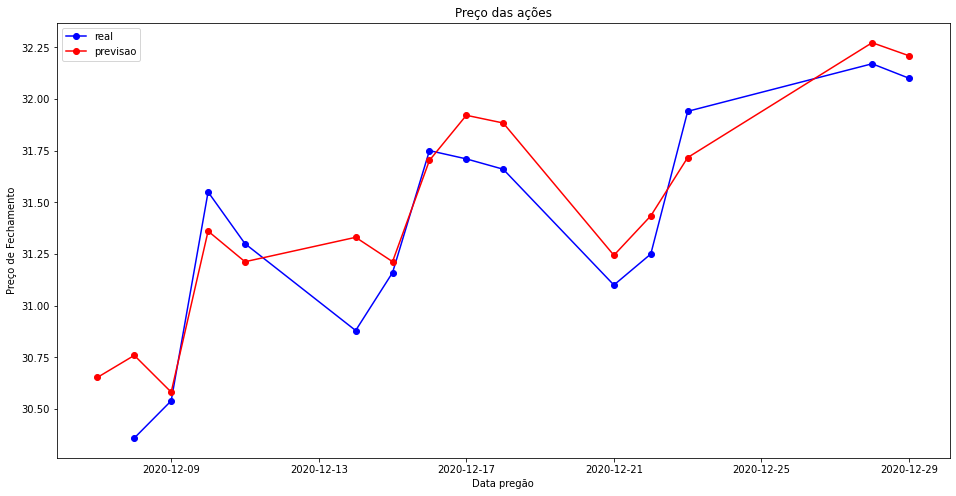

In [57]:
#grafico
plt.figure(figsize=(16,8))
plt.title('Preço das ações')
plt.plot(df['real'],label="real",color='blue', marker='o')
plt.plot(df['previsao'],label="previsao",color='red', marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()

In [58]:
pred = search.predict(previsao)

df = pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)

print(df)

              real   previsao
data_pregao                  
2020-12-07     NaN  30.657525
2020-12-08   30.36  30.763697
2020-12-09   30.54  30.588895
2020-12-10   31.55  31.370112
2020-12-11   31.30  31.215751
2020-12-14   30.88  31.334555
2020-12-15   31.16  31.217463
2020-12-16   31.75  31.709161
2020-12-17   31.71  31.922198
2020-12-18   31.66  31.888610
2020-12-21   31.10  31.248728
2020-12-22   31.25  31.437556
2020-12-23   31.94  31.718174
2020-12-28   32.17  32.272926
2020-12-29   32.10  32.210093


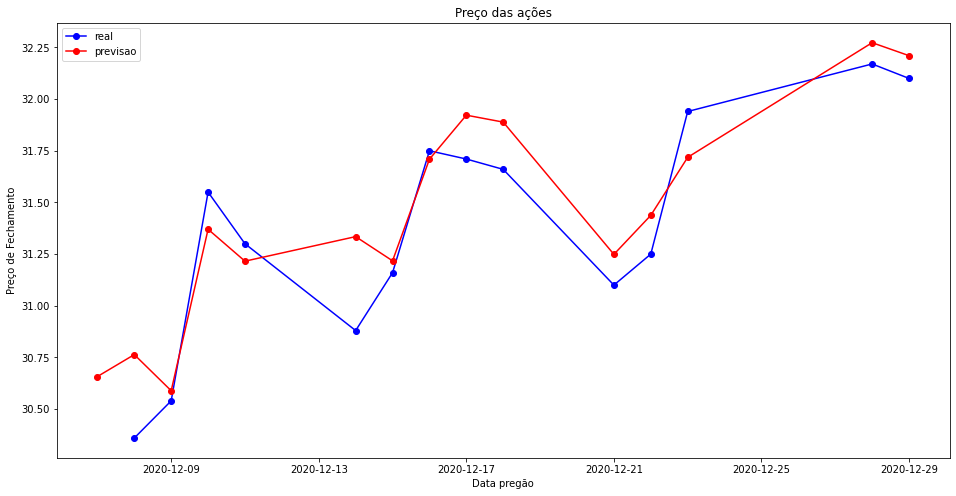

In [59]:
#grafico
plt.figure(figsize=(16,8))
plt.title('Preço das ações')
plt.plot(df['real'],label="real",color='blue', marker='o')
plt.plot(df['previsao'],label="previsao",color='red', marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()